<a href="https://colab.research.google.com/github/Yagut21/Data-Science/blob/main/Homework9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#First execute this cell go to Runtime and click on Restart Runtime
!pip install --upgrade --no-deps statsmodels
!pip install  StatsForecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 4.9 MB/s eta 0:00:00


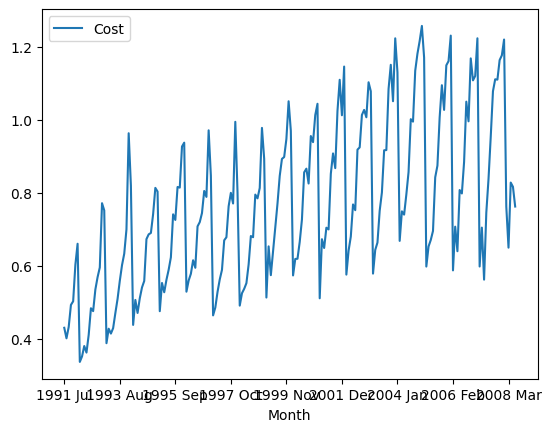

In [2]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


In [3]:
ap1

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2008 Feb,0.761822
2008 Mar,0.649435
2008 Apr,0.827887


Using the above data set

1)Test stationary of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criterion metric.

5)Split data into train and test. For the test data, use last 12 months observation.

6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

7) Using the Statsforecast library, implement the following models: AutoARIMA, AutoETS, HoltWinters,  AutoTheta, and MSTL and plot the forecast of this model .Evaluate the performance of these model model using  MSE (Mean Squared Error).Note that seasonality period is 12.


In [4]:
from statsmodels.tsa.stattools import adfuller
series = ap1['Cost']
adf_result = adfuller(series)
print("ADF Test for Stationarity\n")
print("Null Hypothesis H₀: Series has a unit root (non-stationary)")
print("Alternative Hypothesis H₁: Series is stationary\n")
print(f"Test Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")
if adf_result[1] < 0.05:
    print("\n✅ Conclusion: Reject H₀. The series is stationary at 5% level.")
else:
    print("\n❌ Conclusion: Fail to reject H₀. The series is NOT stationary at 5% level.")

ADF Test for Stationarity

Null Hypothesis H₀: Series has a unit root (non-stationary)
Alternative Hypothesis H₁: Series is stationary

Test Statistic: -1.6967562070359845
p-value: 0.43278454683042955
Critical Values:
   1%: -3.465620397124192
   5%: -2.8770397560752436
   10%: -2.5750324547306476

❌ Conclusion: Fail to reject H₀. The series is NOT stationary at 5% level.


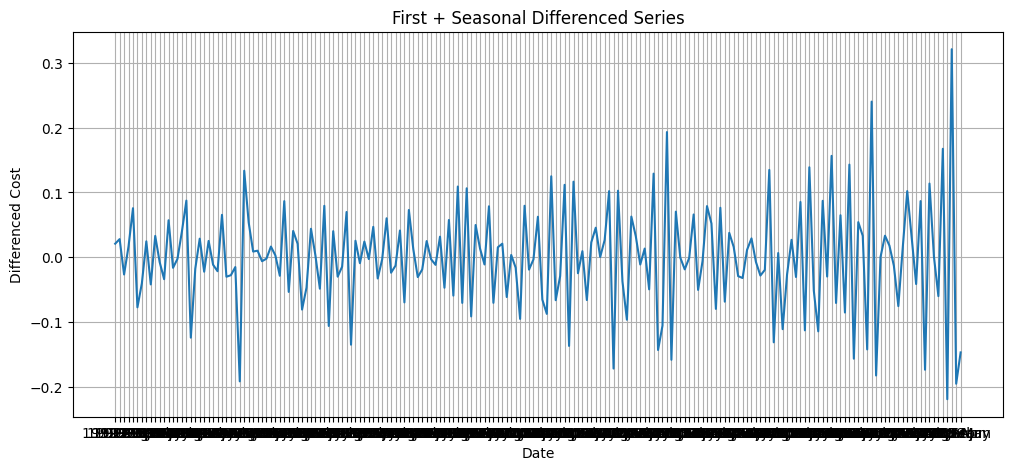


ADF Test on First + Seasonal Differenced Series
Null Hypothesis H₀: Series has a unit root (non-stationary)
Alternative Hypothesis H₁: Series is stationary

Test Statistic: -5.07040327971582
p-value: 1.607283495966982e-05
Critical Values:
   1%: -3.467631519151906
   5%: -2.8779183721695567
   10%: -2.575501353364474

✅ Conclusion: Reject H₀. The differenced series is stationary at 5% level.


In [5]:
import matplotlib.pyplot as plt
first_diff = ap1['Cost'].diff().dropna()

seasonal_diff = first_diff.diff(12).dropna()

plt.figure(figsize=(12, 5))
plt.plot(seasonal_diff)
plt.title("First + Seasonal Differenced Series")
plt.xlabel("Date")
plt.ylabel("Differenced Cost")
plt.grid()
plt.show()

adf_result = adfuller(seasonal_diff)

print("\nADF Test on First + Seasonal Differenced Series")
print("Null Hypothesis H₀: Series has a unit root (non-stationary)")
print("Alternative Hypothesis H₁: Series is stationary\n")
print(f"Test Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

# Step 6: Conclusion
if adf_result[1] < 0.05:
    print("\n✅ Conclusion: Reject H₀. The differenced series is stationary at 5% level.")
else:
    print("\n❌ Conclusion: Fail to reject H₀. The differenced series is NOT stationary.")

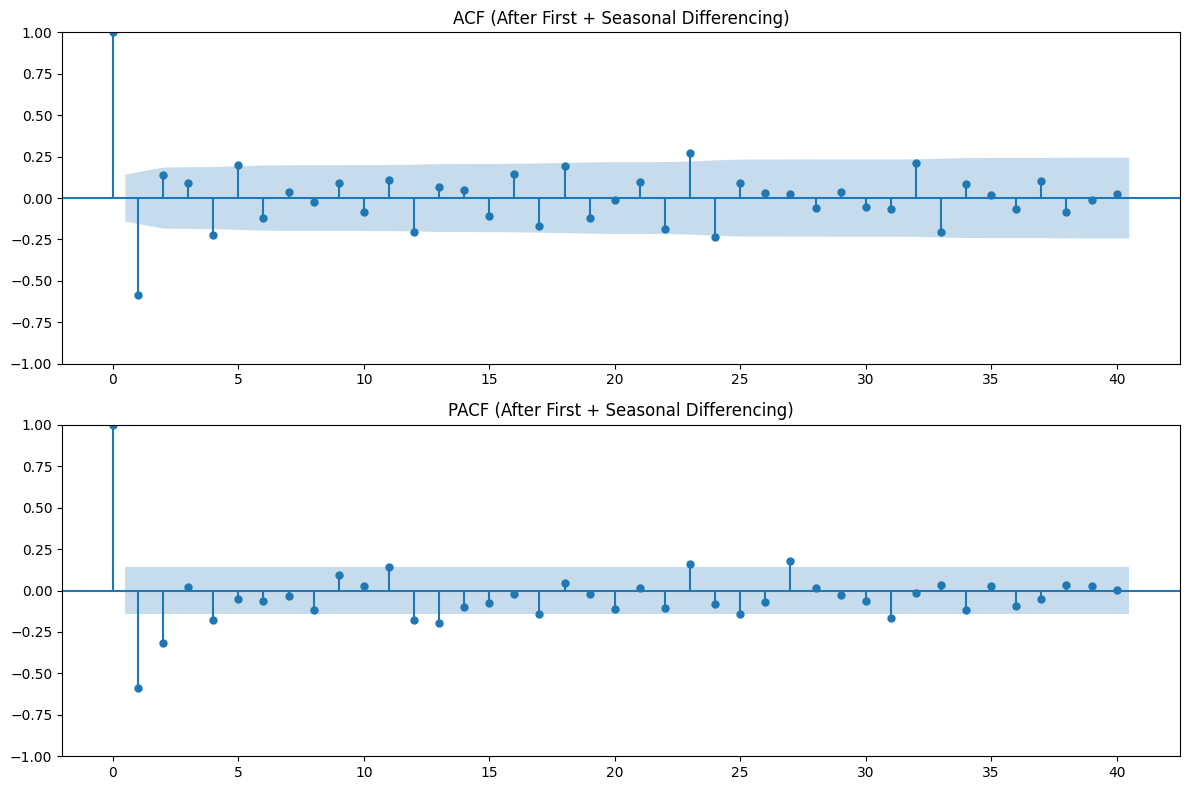

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

first_diff = ap1['Cost'].diff().dropna()
seasonal_diff = first_diff.diff(12).dropna()

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(seasonal_diff, lags=40, ax=axes[0])
axes[0].set_title("ACF (After First + Seasonal Differencing)")

plot_pacf(seasonal_diff, lags=40, ax=axes[1], method='ywm')
axes[1].set_title("PACF (After First + Seasonal Differencing)")

plt.tight_layout()
plt.show()

In [7]:
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

y = ap1['Cost']

model1 = SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12))
results1 = model1.fit()
print("Model 1 AIC (SARIMA(1,1,1)(1,1,1,12)):", results1.aic)

model2 = SARIMAX(y, order=(1,1,2), seasonal_order=(0,1,1,12))
results2 = model2.fit()
print("Model 2 AIC (SARIMA(1,1,2)(0,1,1,12)):", results2.aic)

better_model = "Model 1" if results1.aic < results2.aic else "Model 2"
print(f"\n✅ The better model based on AIC is: {better_model}")

Model 1 AIC (SARIMA(1,1,1)(1,1,1,12)): -554.6784172937761
Model 2 AIC (SARIMA(1,1,2)(0,1,1,12)): -553.8775634235591

✅ The better model based on AIC is: Model 1


In [8]:
y = ap1['Cost']

train = y.iloc[:-12]
test = y.iloc[-12:]

print(f"Train size: {len(train)} observations")
print(f"Test size: {len(test)} observations")
print("\nTest period:\n", test)

Train size: 192 observations
Test size: 12 observations

Test period:
 Month
2007 Jul    0.954144
2007 Aug    1.078219
2007 Sep    1.110982
2007 Oct    1.109979
2007 Nov    1.163534
2007 Dec    1.176589
2008 Jan    1.219941
2008 Feb    0.761822
2008 Mar    0.649435
2008 Apr    0.827887
2008 May    0.816255
2008 Jun    0.762137
Name: Cost, dtype: float64


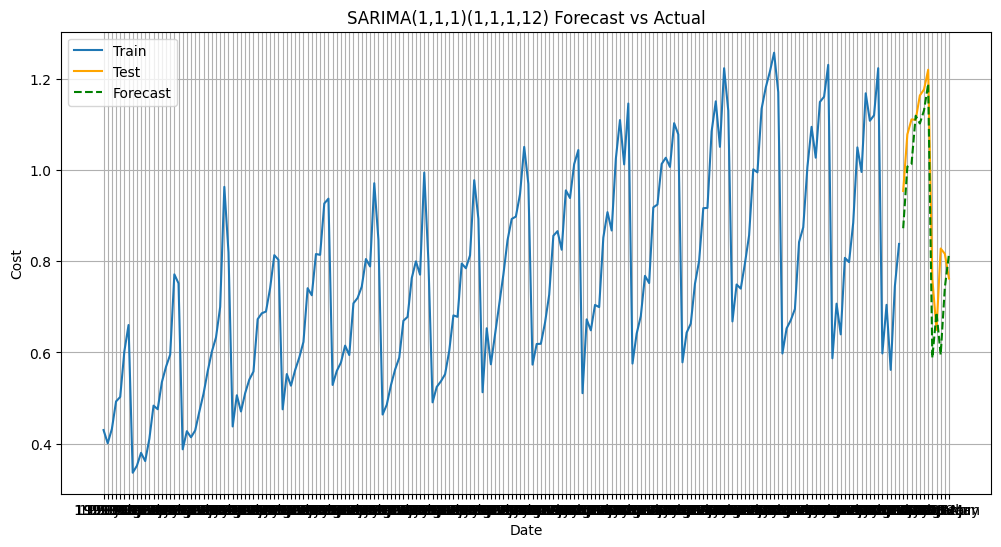

📊 Forecast Evaluation Metrics:
MAE  (Mean Absolute Error):      0.0808
MAPE (Mean Absolute % Error):    9.11%
MSE  (Mean Squared Error):       0.0102


In [9]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

forecast = results.forecast(steps=12)
forecast.index = test.index

plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(forecast, label='Forecast', color='green', linestyle='--')
plt.title('SARIMA(1,1,1)(1,1,1,12) Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.show()

mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100
mse = mean_squared_error(test, forecast)

print(f"📊 Forecast Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error):      {mae:.4f}")
print(f"MAPE (Mean Absolute % Error):    {mape:.2f}%")
print(f"MSE  (Mean Squared Error):       {mse:.4f}")

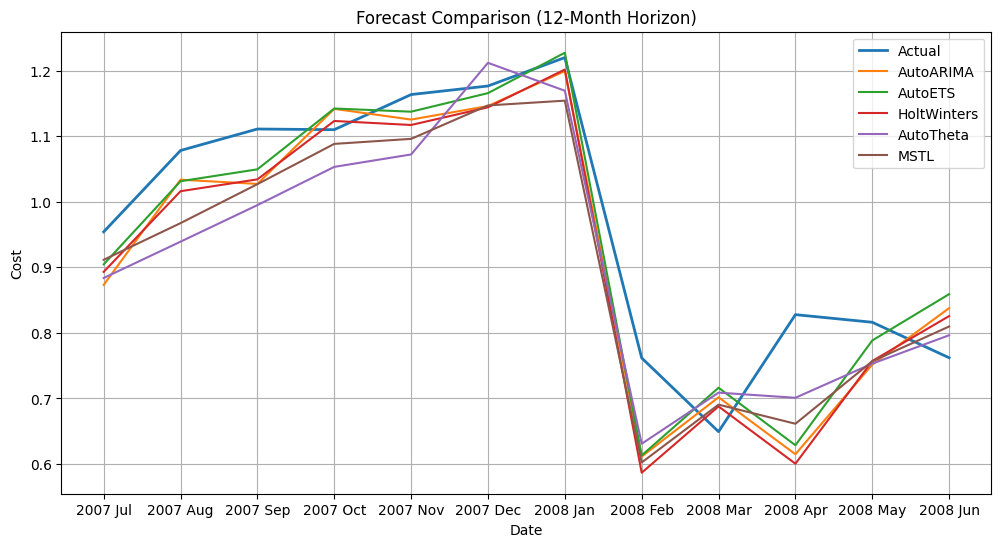

📊 MSE Comparison for StatsForecast Models:
ds: 1434581401512959935871473234009391104.0000
AutoARIMA: 0.0083
AutoETS: 0.0072
HoltWinters: 0.0090
AutoTheta: 0.0079
MSTL: 0.0077


In [10]:
from statsforecast import StatsForecast
from statsforecast.models import (
    AutoARIMA, AutoETS, HoltWinters, AutoTheta, MSTL
)
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

sf_df = train.reset_index()
sf_df.columns = ['ds', 'y']
sf_df['unique_id'] = 'cost_series'

sf = StatsForecast(
    models=[
        AutoARIMA(season_length=12),
        AutoETS(season_length=12),
        HoltWinters(season_length=12),
        AutoTheta(season_length=12),
        MSTL(season_length=12)
    ],
    freq='M',
    n_jobs=-1
)

forecast_df = sf.forecast(df=sf_df, h=12)

y_test = test.values

mse_scores = {}
for model in forecast_df.columns[1:]:
    y_pred = forecast_df[model].values
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[model] = mse

plt.figure(figsize=(12,6))
plt.plot(test.index, y_test, label='Actual', linewidth=2)

for col in ['AutoARIMA', 'AutoETS', 'HoltWinters', 'AutoTheta', 'MSTL']:
    plt.plot(test.index, forecast_df[col], label=col)

plt.title('Forecast Comparison (12-Month Horizon)')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.show()

print("📊 MSE Comparison for StatsForecast Models:")
for model, mse in mse_scores.items():
    print(f"{model}: {mse:.4f}")